---

### Matplotlib

Run the code cell below to load the dataset to apply matplotlib functions.

In [1]:
# Run the code cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1) 

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median() # Get the median value for each column after excluding -200.
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Get the columns in the original DataFrame.
df.columns

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day',
       'Day Name'],
      dtype='object')

The description for all the columns containing data for air pollutants, temperature, relative humidity and absolute humidity is provided below.


|Columns|Description|
|-|-|
|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally $\text{CO}$ targeted)|
|C6H6(GT)|True hourly averaged Benzene concentration in $\frac{\mu g}{m^3}$|
|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally $\text{NMHC}$ targeted)|
|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_x$ targeted)|
|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_2$ targeted)|
|PT08.S5(O3) |PT08.S5 (indium oxide) hourly averaged sensor response (nominally $\text{O}_3$ targeted)|
|T|Temperature in Â°C|
|RH|Relative Humidity (%)|
|AH|AH Absolute Humidity|

---

####  Customised `matplotlib` Plots^

Let's create a line plot to trace the monthly median concentration of air pollutants, temperature, relative humidity and average humidity in 2004 and 2005.

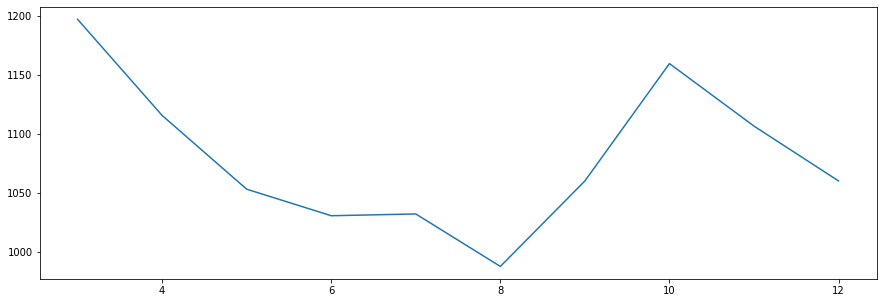

In [3]:
# Create a line plot for the monthly median concentration of CO in 2004.
# Group the DataFrames month-wise such that the 'Month' column is not an index.
# G.1rouping monthwise such that the 'Month' column is not an index.
group_2004_month = aq_2004_df.groupby(by='Month', as_index = False)
group_2005_month = aq_2005_df.groupby(by='Month', as_index = False)

plt.figure(figsize=(15, 5))
plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'])
plt.show()

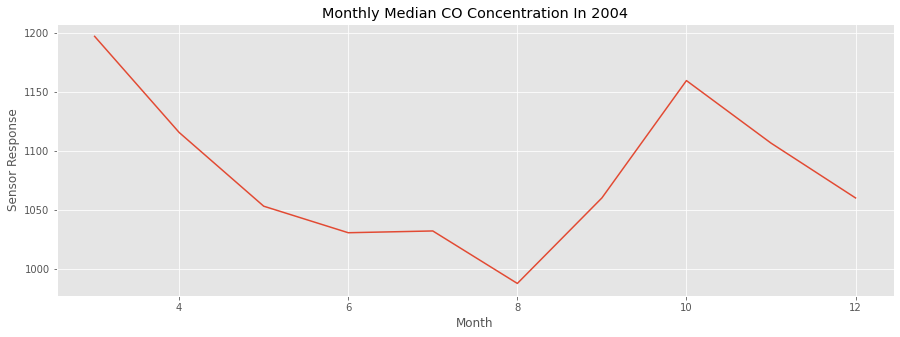

In [4]:
#  Adding the 'ggplot' style and a title in the above plot. Also, label the coordinate axes and add a grid.
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
plt.title('Monthly Median CO Concentration In 2004')
plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'])
plt.xlabel('Month')
plt.ylabel('Sensor Response')
plt.grid(True)
plt.show()

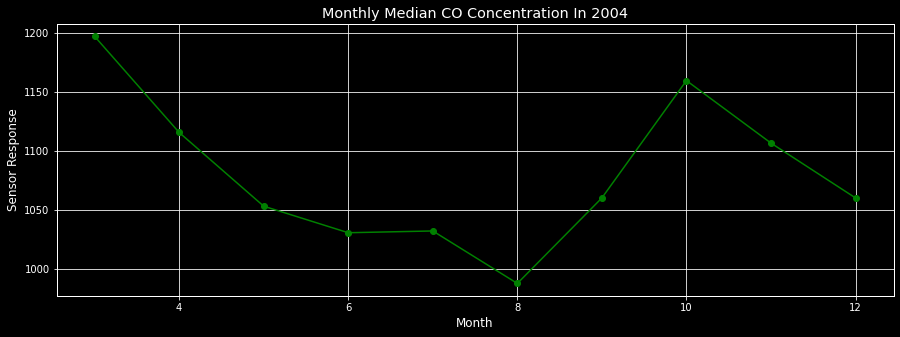

In [5]:
# In the above plot, pass 'g-o' as the third parameter.
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
plt.title('Monthly Median CO Concentration In 2004')
plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'], "g-o")
plt.xlabel('Month')
plt.ylabel('Sensor Response')
plt.grid(True)
plt.show()

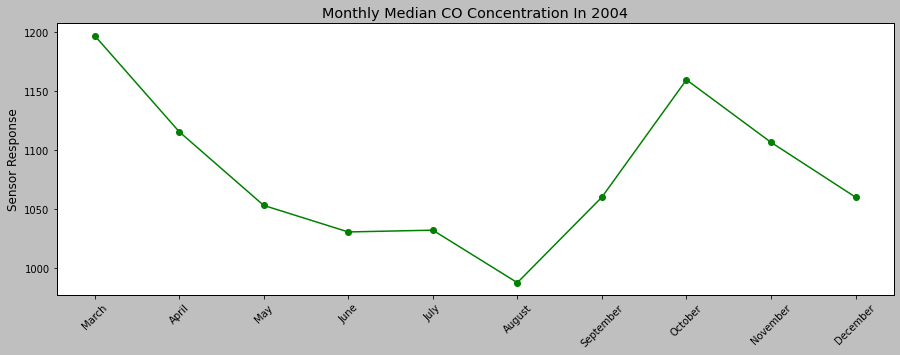

In [6]:
#  In the above plot, replace the numeric values in the 'x-axis' with the actual month names.
# Create a list of actual month names.
months_2004 = aq_2004_df["DateTime"].dt.month_name().unique()
plt.style.use('grayscale')
plt.figure(figsize=(15, 5))
plt.title('Monthly Median CO Concentration In 2004')
plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'], "g-o")
plt.xticks(ticks=group_2004_month.median()["Month"], labels=months_2004, rotation=45)
plt.ylabel('Sensor Response')
plt.grid(False)
plt.show()

In [7]:
common_months = []
for month in aq_2005_df['Month'].unique():
  if month in aq_2004_df['Month'].unique():
    common_months.append(month)

# Create a list to store only the common month names
common_month_names = []
for month_name in aq_2005_df['DateTime'].dt.month_name().unique():
  if month_name in aq_2004_df['DateTime'].dt.month_name().unique():
    common_month_names.append(month_name)

# Print the lists
print(common_months)
print(common_month_names)

[3, 4]
['March', 'April']


So only for March and April months, we have records for both the years 2004 and 2005.


In [8]:
#  Group the DataFrame for the year 2004 such that we have monthly median values for March and April.
group_2004_common_months = group_2004_month.median()[group_2004_month.median()['Month'] < 5]
group_2004_common_months

,Month,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
0,3,1197.0,8.65,926.0,966.5,1543.0,992.5,14.05,52.2,0.79205,2004.0,21.0
1,4,1115.5,8.80,931.0,882.0,1555.0,949.0,16.30,50.1,0.92410,2004.0,15.5


In [10]:
# Group the DataFrame for the year 2005 such that we have monthly median values for March and April.
group_2005_common_months = group_2005_month.median()[group_2005_month.median()['Month'] > 2]
group_2005_common_months

,Month,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
2,3,1126.0,6.6,841.0,684.5,1217.0,1039.5,13.5,51.8,0.7834,2005.0,16.0
3,4,925.0,3.3,669.0,906.0,936.0,556.0,15.1,35.6,0.5977,2005.0,2.0


 **Comparing Monthly Median CO Concentrations in 2004 & 2005**.

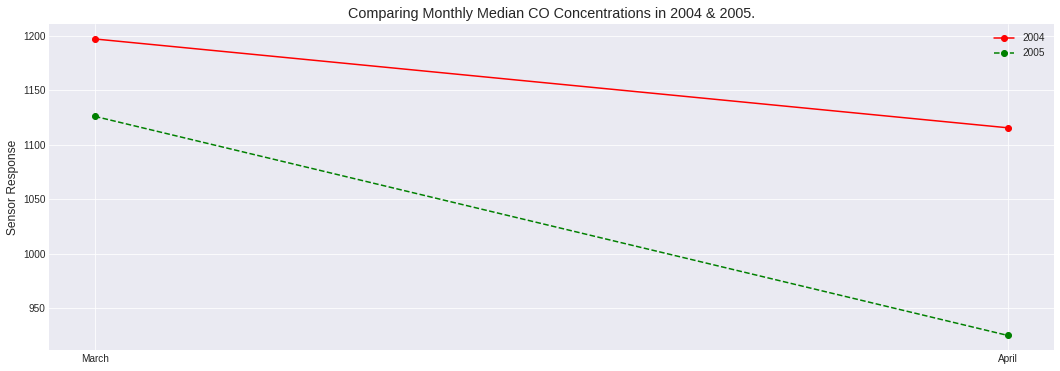

In [11]:
#Create a line plot for the monthly median CO concentrations for both the years. Use the 'seaborn-dark' style this time. 
plt.style.use('seaborn-dark')
plt.figure(figsize=(18, 6))
plt.title("Comparing Monthly Median CO Concentrations in 2004 & 2005.")
plt.plot(group_2004_common_months['Month'], group_2004_common_months['PT08.S1(CO)'], 'ro-', label='2004') 
# The plot will be in red colour. The turning points will have filled circles.
plt.plot(group_2005_common_months['Month'], group_2005_common_months['PT08.S1(CO)'], 'go--', label='2005') 
# The plot will be in green colour. It will have hyphenated lines & filled circles at the turning points.
plt.ylabel('Sensor Response')
plt.xticks(ticks=group_2004_common_months['Month'], labels=common_month_names)
plt.legend()
plt.grid(True)
plt.show()

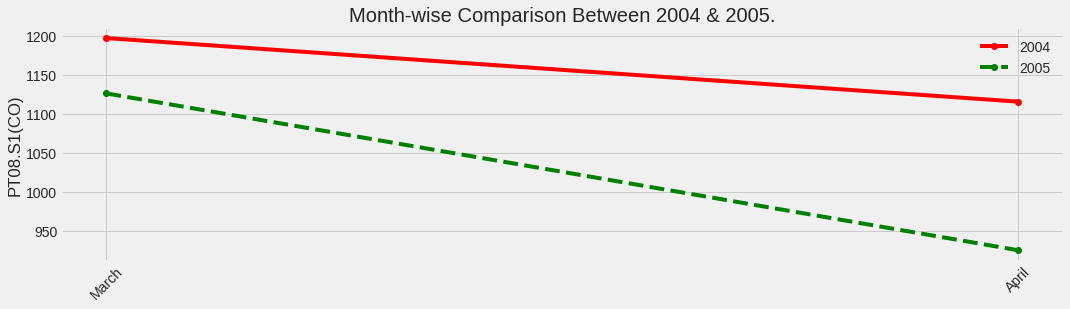

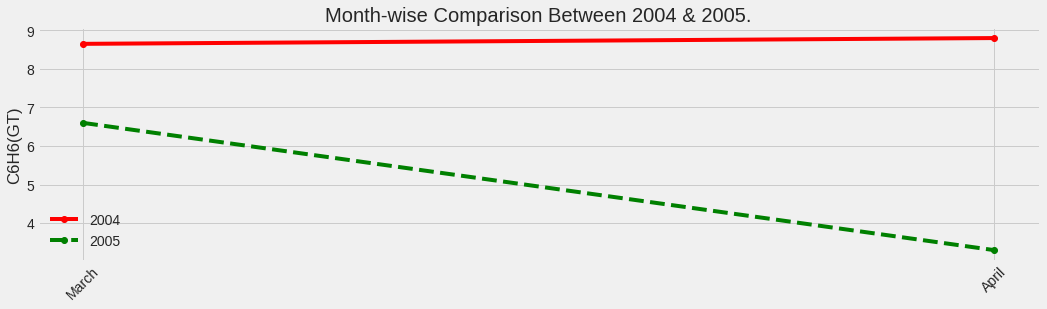

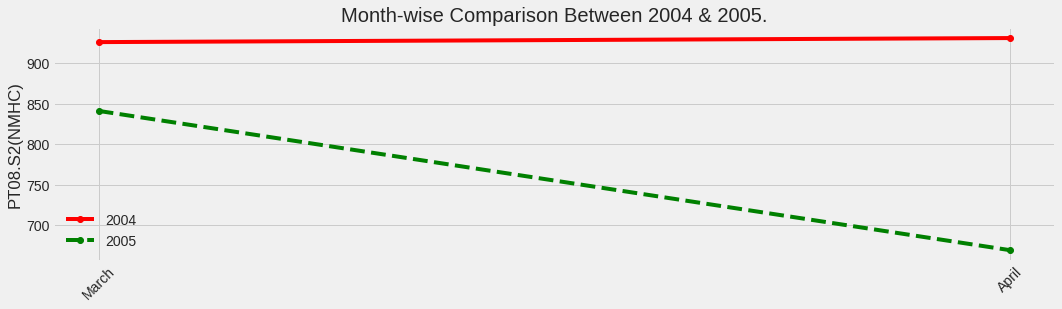

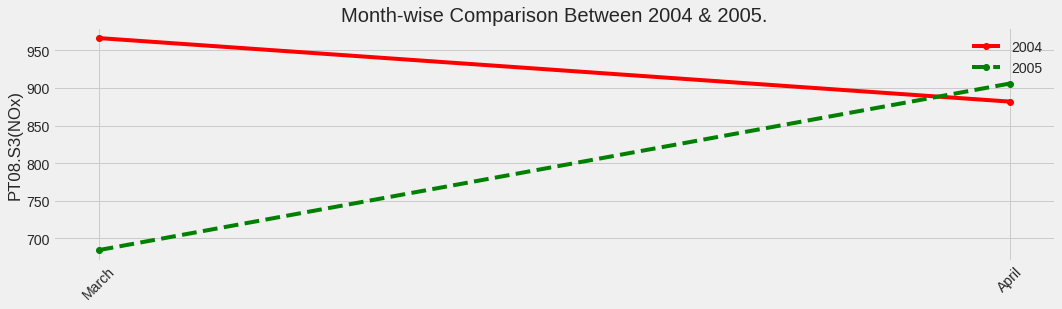

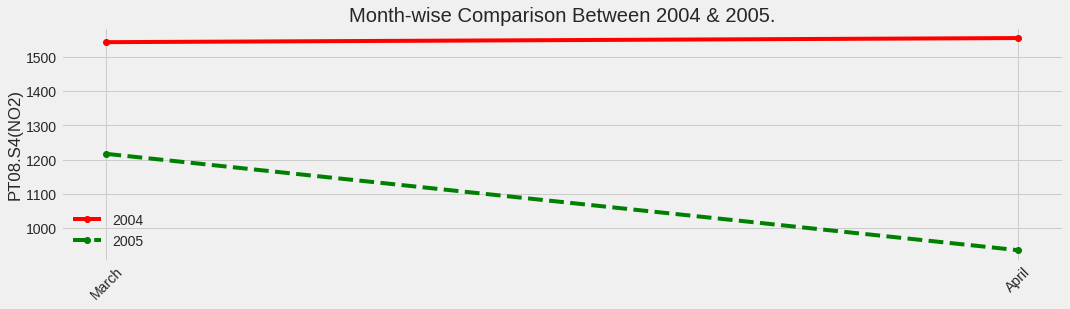

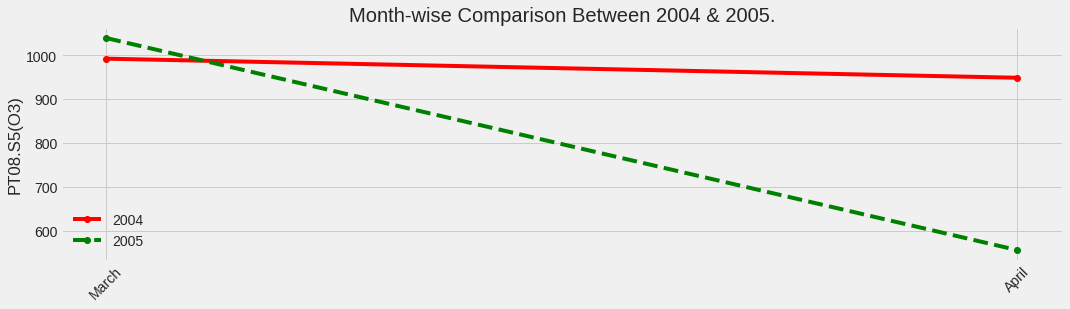

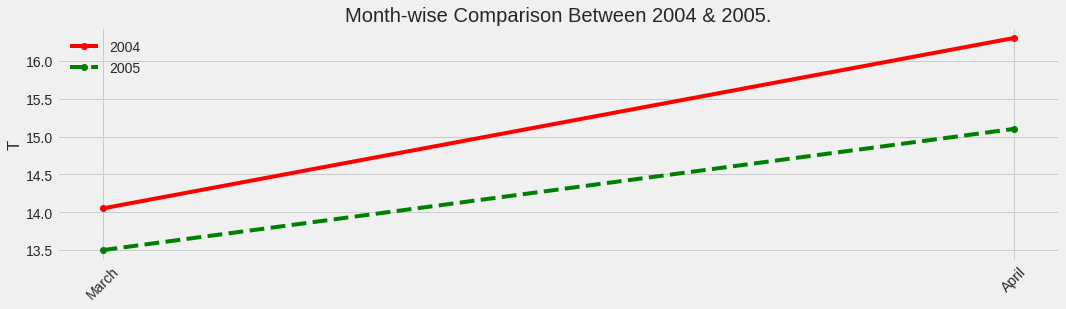

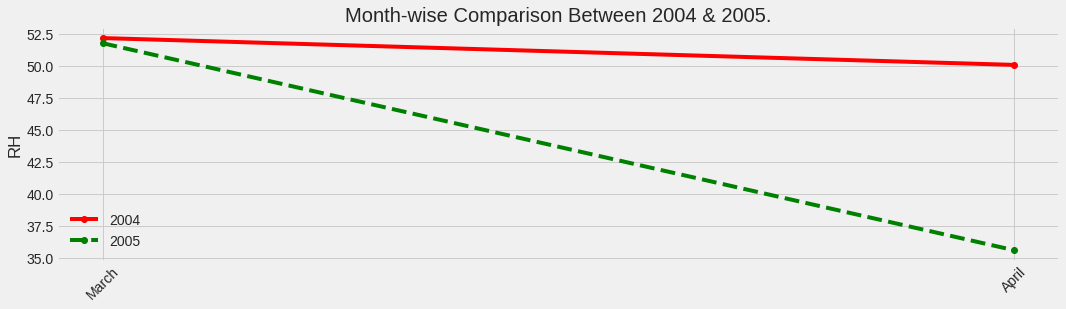

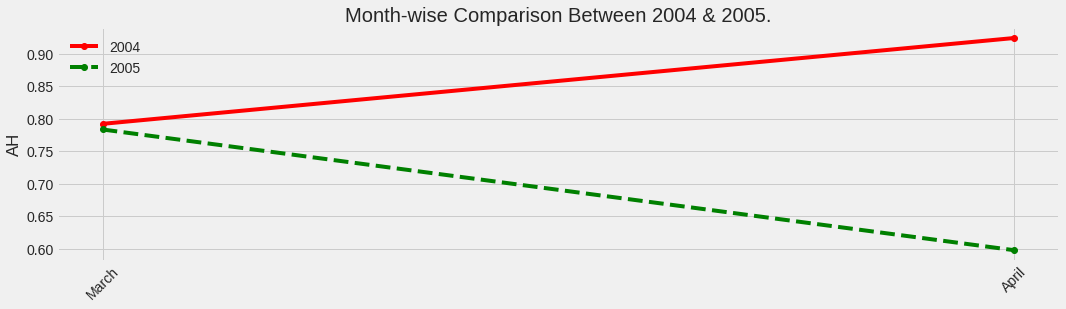

In [ ]:
# Creating a month-wise comparison plot for all the air pollutants concentration, temperature, relative humidity and absolute humidity.
plt.style.use('fivethirtyeight')
for col in group_2004_common_months.columns[1:-2]:
  plt.figure(figsize=(16, 4))
  plt.title("Month-wise Comparison Between 2004 & 2005.")
  plt.plot(common_months, group_2004_common_months[col], 'r-o', label='2004')
  plt.plot(common_months, group_2005_common_months[col], 'g--o', label='2005')
  plt.ylabel(col)
  plt.xticks(ticks=group_2004_common_months['Month'], labels=common_month_names, rotation=45)
  plt.legend()
  plt.grid(True)
  plt.show()

From the above graphs, we can see that for the same months in the year 2004 and 2005, the median concentrations were higher in the year 2004. This suggests that the air quality was probably better in 2005 in March and April compared to the year 2004 for the same months.

---

**NUMPY**

Doing as per the tutorial as havenot worked with numpy advance version.

In [12]:
# importing a picture 
from matplotlib import image

img = image.imread("apple.jpg")

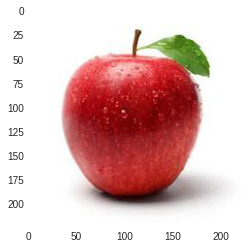

(225, 225, 3)
3


In [15]:
# charactering the picture into matrix dimensions
plt.imshow(img)
plt.show()
print(img.shape)
print(img.ndim)

In [16]:
img[:, :, 0]#as the image is a read colour apple most of the values are 255

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [17]:
img[:, :, 0].shape

(225, 225)

 linear algebra operations on this data, it might be more interesting to have real numbers between 0 and 1 in each entry of the matrices to represent the RGB values.


In [19]:
img_array = img / 255
img_array

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [20]:
#assign each color channel to a separate matrix using the slice syntax
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

In [21]:
from numpy import linalg #importing linear algebra

Y= 0.2126R+ 0.7152B+ 0.0722G

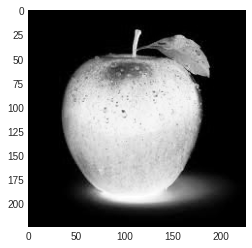

In [23]:
# Converting the image to gray scale.which has a formula derived interm of red blue and green.Y= 0.2126R+ 0.7152B+ 0.0722G
# @ operator (the matrix multiplication operator for NumPy arrays
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
plt.imshow(img_gray)#without using colourmap

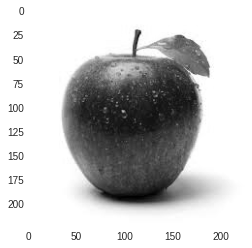

In [24]:
plt.imshow(img_gray, cmap="gray")#using the colormap

**reconstructing this image back to its orginal image**

[for theory refer this link](https://https://numpy.org/doc/stable/user/tutorial-svd.html)


In [25]:
U, s, Vt = linalg.svd(img_gray)

In [28]:
import numpy as np
U.shape, s.shape, Vt.shape


((225, 225), (225,), (225, 225))

In [32]:
Sigma = np.zeros((225, 225))#converting s into 2d as its 1d 
for i in range(225):
     Sigma[i, i] = s[i]

In [33]:
linalg.norm(img_gray - U @ Sigma @ Vt)

3.225937489428153e-13

In [34]:
np.allclose(img_gray, U @ Sigma @ Vt)

True

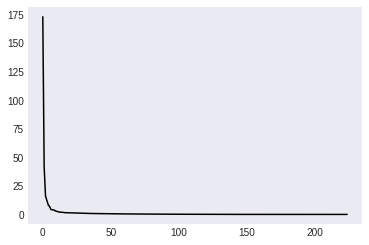

In [35]:
 plt.plot(s)

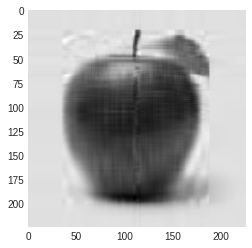

In [38]:
k = 10
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")

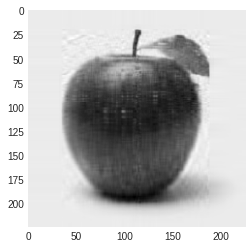

In [39]:
k = 20 # as we increase the value of k we can obtain a clear graph from the plot
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")

the SVD can be applied to all axes at once. However, the linear algebra functions in NumPy expect to see an array of the form (N, M, M), where the first axis represents the number of matrices , so transpoing it.

In [41]:

img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 225, 225)

In [42]:
U, s, Vt = linalg.svd(img_array_transposed)

In [43]:
U.shape, s.shape, Vt.shape

((3, 225, 225), (3, 225), (3, 225, 225))

In [46]:
Sigma = np.zeros((3, 225, 225))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

In [48]:
reconstructed = U @ Sigma @ Vt
reconstructed.shape

(3, 225, 225)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


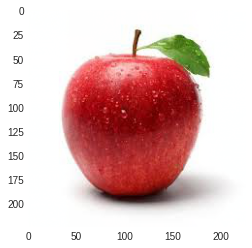

In [49]:
 plt.imshow(np.transpose(reconstructed, (1, 2, 0)))



---



---



**RegEX**

In [50]:
import re

string = 'hello 12 hi 89. Howdy 34'
pattern = '\d+'

result = re.findall(pattern, string) 
print(result)

['12', '89', '34']


In [51]:
import re

string = 'Twelve:12 Eighty nine:89.'
pattern = '\d+'

result = re.split(pattern, string) 
print(result)



['Twelve:', ' Eighty nine:', '.']


In [52]:

# Program to remove all whitespaces
import re

# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'

# empty string
replace = ''

new_string = re.sub(pattern, replace, string) 
print(new_string)

abc12de23f456


In [53]:
string = "Python is fun"

# check if 'Python' is at the beginning
match = re.search('\APython', string)

if match:
  print("pattern found inside the string")
else:
  print("pattern not found")  


pattern found inside the string


In [54]:
string = '39801 356, 2102 1111'

# Three digit number followed by space followed by two digit number
pattern = '(\d{3}) (\d{2})'

# match variable contains a Match object.
match = re.search(pattern, string) 

if match:
  print(match.group())
else:
  print("pattern not found")

801 35


In [55]:
string = '\n and \r are escape sequences.'

result = re.findall(r'[\n\r]', string) 
print(result)

['\n', '\r']
